In [243]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.probability import FreqDist
from statistics import mean
from wordcloud import WordCloud,  ImageColorGenerator
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer

##  Import data

In [253]:
songList = pd.read_csv('lyrics.csv')
songList.head()

,song,year,artist,genre,lyrics
0,when-you-were-with-me,2009,a,Hip-Hop,I stopped by the house we called our home\nIt ...
1,careless-whisper,2009,a,Hip-Hop,I feel so unsure\nAs I take your hand and lead...
2,2-59,2007,a,Hip-Hop,Mark:] Sunday football I got boot off the pitc...
3,power-of-desire,2007,a,Hip-Hop,[Chris:] Fallin' for a fantasy\nI threw away m...
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...


## Text processing

### overview of the song list

In [245]:
songList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125715 entries, 0 to 125714
Data columns (total 5 columns):
song      125715 non-null object
year      125715 non-null int64
artist    125715 non-null object
genre     125715 non-null object
lyrics    125715 non-null object
dtypes: int64(1), object(4)
memory usage: 4.8+ MB


In [246]:
songList['genre'].unique()

array(['Hip-Hop', 'Other', 'Pop', 'Metal', 'Rock', 'Country', 'Indie',
       'Jazz', 'Not Available', 'Electronic', 'R&B', 'Folk'], dtype=object)

### Exclude songs with missing information

remove songs without lyrics

In [247]:
emptyLyrics = len(songList)
songList = songList[songList['lyrics']!='instrumental'].dropna()
emptyLyrics -= len(songList)
print(str(emptyLyrics) + " rows dropped (no lyrics).")

0 rows dropped (no lyrics).


Some songs missed genres, so those are excluded from the dataset.

In [255]:
songList = songList[(songList.genre != 'Other')&songList.genre != 'Not Available']

### Convert text to lower case

In [256]:
processed_text.lyrics = songList.lyrics.apply(lambda x: x.lower())

### Remove punctuations

In [250]:
def remove_punctuation(text):
    text_nopunct = "".join([c for c in text if c not in punctuation])
    return text_nopunct

processed_text.lyrics = processed_text.lyrics.map(lambda x: remove_punctuation(x))

### Remove numbers

In [251]:
def remove_numbers(text):
    return "".join(c for c in text if not c.isdigit())

processed_text.lyrics = processed_text.lyrics.map(lambda x: remove_numbers(x))

### Word tokenize

In [257]:
processed_text['word_tokens'] = processed_text.lyrics.apply(nltk.word_tokenize)

### Remove empty words

In [232]:
def remove_emptywords(text):
    while("" in text) : 
        text.remove("") 
    return text

processed_text.word_tokens = processed_text.word_tokens.apply(lambda x: remove_emptywords(x))

### Remove stopwords

In [270]:
stopwords = list(set(stopwords.words("english")))
words = ["lot", "today", "months", "month", "wanna", "wouldnt", "wasnt", "ha", "na", "ooh", "da",
        "gonna", "im", "dont", "aint", "wont", "yeah", "la", "oi", "nigga", "fuck",
          "hey", "year", "years", "last", "past", "feel"]

def remove_stopwords(text):
    result = [c for c in text if c not in stopwords + words]
    return result

processed_text.word_tokens = processed_text.word_tokens.apply(lambda x: remove_stopwords(x))

### Stemming

In [271]:
snowball_stemmer = SnowballStemmer('english')

def stemmed_word(text):
    return [snowball_stemmer.stem(c) for c in text]

processed_text['stemmedwords'] = processed_text.word_tokens.apply(lambda x: stemmed_word(x))

In [272]:
def processed_lyrics(text):
    return " ".join([c for c in text])

processed_text['processed_lyrics'] = processed_text.stemmedwords.apply(lambda x: processed_lyrics(x))

### Add the length of lyrics

In [273]:
processed_text['length'] = processed_text['lyrics'].apply(len)

In [274]:
processed_text.head()

,song,year,artist,genre,lyrics,word_tokens,length,stemmedwords,processed_lyrics
0,when-you-were-with-me,2009,a,Hip-Hop,i stopped by the house we called our home\nit ...,"[stopped, house, called, home, little, rundown...",511,"[stop, hous, call, home, littl, rundown, ,, gr...","stop hous call home littl rundown , grass over..."
1,careless-whisper,2009,a,Hip-Hop,i feel so unsure\nas i take your hand and lead...,"[unsure, take, hand, lead, dance, floor, music...",1518,"[unsur, take, hand, lead, danc, floor, music, ...","unsur take hand lead danc floor music die , so..."
2,2-59,2007,a,Hip-Hop,mark:] sunday football i got boot off the pitc...,"[mark, :, ], sunday, football, got, boot, pitc...",1775,"[mark, :, ], sunday, footbal, got, boot, pitch...",mark : ] sunday footbal got boot pitch peopl g...
3,power-of-desire,2007,a,Hip-Hop,[chris:] fallin' for a fantasy\ni threw away m...,"[[, chris, :, ], fallin, ', fantasy, threw, aw...",756,"[[, chris, :, ], fallin, ', fantasi, threw, aw...",[ chris : ] fallin ' fantasi threw away destin...
4,you-re-not-in-love,2007,a,Hip-Hop,something in the way we touch\nyou hold my han...,"[something, way, touch, hold, hand, hold, back...",593,"[someth, way, touch, hold, hand, hold, back, m...",someth way touch hold hand hold back much some...


## Data visualizations

### Count the number of songs of each genre and produce a bar graph

In [258]:
processed_text.genre.value_counts()

Rock             64850
Pop              18698
Metal            11311
Hip-Hop           8905
Country           7534
Jazz              4123
Not Available     3325
Electronic        2815
R&B               2175
Indie             1318
Folk               514
Other              147
Name: genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

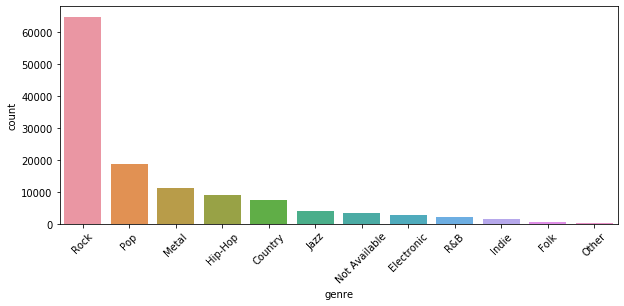

In [263]:
fig, axes = plt.subplots(1,1, figsize= (10,4))

sns.countplot(processed_text['genre'], order = processed_text['genre'].value_counts().index)
plt.xticks(rotation = 45)

### Get the number of songs released per year and the proportion that is dedicated to each genre, and produce the line plot

In [264]:
np.sort(processed_text['year'].unique())

array([ 112,  702, 1968, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

In [265]:
def grouped_by_year(n, m):
    grouped = processed_text[(songList.year >= n)&(songList.year < m)].groupby(['year','genre']).count()['song']
    return grouped

Drop year 112, 702, 1968

In [266]:
pd.DataFrame(grouped_by_year(1970, 2020))

song
year genre              
1970 Jazz              6
     Not Available     8
     Other             3
     Pop               2
     R&B              12
...                  ...
2016 Not Available    97
     Other            59
     Pop             691
     R&B              51
     Rock           1238

[371 rows x 1 columns]

In [216]:
genre = ['Rock', 'Pop', 'Metal', 'Hip-Hop', 'Country','Jazz', 'Electronic','R&B','Indie','Folk']
year = [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989,1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016]

Text(0.5, 1.0, 'Percentage of Each Genre by year')

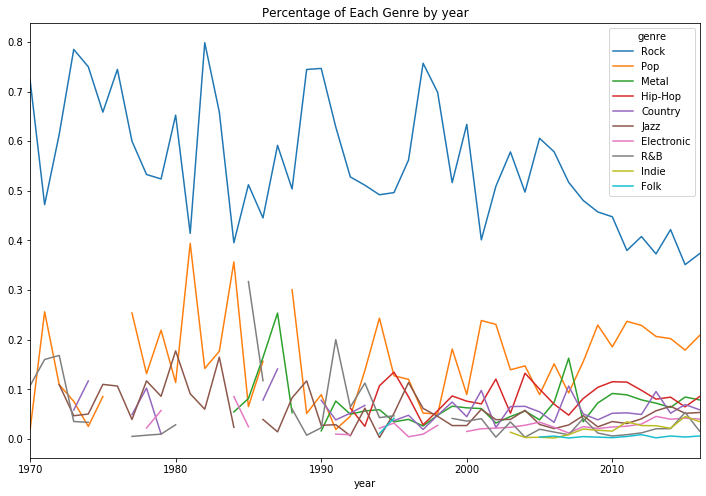

In [267]:
fig, axes = plt.subplots(1,1, figsize= (12,8))
genres_by_year = processed_text.groupby(['year','genre']).count()['song'].drop([112, 702, 1968]) / processed_text.groupby(['year'])['song'].count().drop([112,  702, 1968])
genres_by_year.unstack()[genre].plot(ax = axes)
plt.title('Percentage of Each Genre by year')

### produce the bar chart of average words per song by genre

In [275]:
rock = processed_text[processed_text.genre == 'Rock']
pop = processed_text[processed_text.genre == 'Pop']
metal = processed_text[processed_text.genre == 'Metal']
hiphop = processed_text[processed_text.genre == 'Hip-Hop']
country = processed_text[processed_text.genre == 'Country']
jazz = processed_text[processed_text.genre == 'Jazz']
electronic = processed_text[processed_text.genre == 'Electronic']
rb = processed_text[processed_text.genre == 'R&B']
indie = processed_text[processed_text.genre == 'Indie']
folk = processed_text[processed_text.genre == 'Folk']

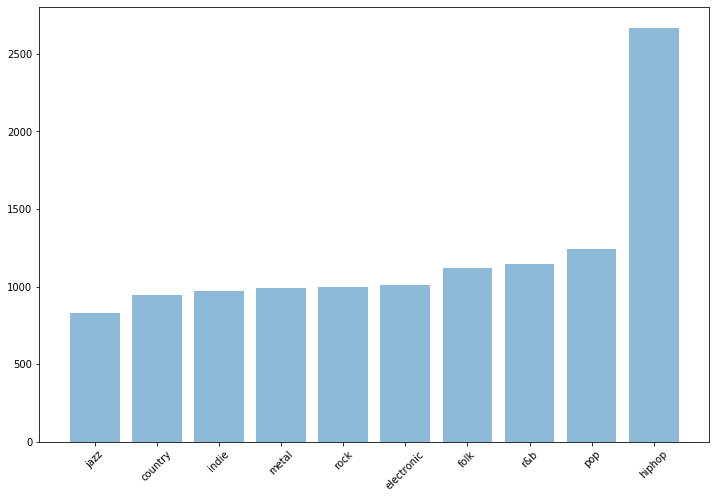

In [278]:
def average_words(genre):
    return mean(genre.length)


avg = pd.DataFrame({
    'genre': ['rock', 'pop', 'metal', 'hiphop', 'country', 'jazz', 'electronic', 'r&b', 'indie', 'folk'],
    'words': [average_words(rock), average_words(pop), average_words(metal), average_words(hiphop), average_words(country),
average_words(jazz), average_words(electronic), average_words(rb), average_words(indie), average_words(folk)],
})
avg = avg.sort_values(by=['words'])

y_pos = np.arange(10)
fig, ax = plt.subplots(figsize=(12,8))
plt.bar(y_pos, avg.words, align='center', alpha=0.5)
plt.xticks(y_pos, avg.genre)
plt.xticks(rotation = 45)
    
plt.show()

### Calculate the word frequency and find the 10 most common words in the dataset by genre
### Produce wordcloud of most Common words in the dataset by genre

In [108]:
from nltk.probability import FreqDist
def get_words(text):
    words = ""
    for song in text.iterrows():
        words += " " + song[1]['processed_lyrics']
        
    return words

In [149]:
def word_dist(text):
    token_words = nltk.word_tokenize(get_words(text))
    word_dist = FreqDist(token_words)
    common_words = []
    freq = []
    print("The 10 most common words in the dataset are :")
    for word, frequency in word_dist.most_common(10):
        print(u'{} : {}'.format( word, frequency ))
        
        common_words.append(word)
        freq.append(frequency)
    y_pos = np.arange(10)
    plt.bar(y_pos, freq, align='center', alpha=0.5)
    plt.xticks(y_pos, common_words)
    
    plt.show()
    


In [112]:
def wordcloud(text):
    wordcloud = WordCloud(max_words=100, background_color="white").generate(get_words(text))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


All songs

The 10 most common words in the dataset are :
love : 186942
know : 171666
like : 151973
got : 137066
go : 125540
get : 124956
time : 110012
oh : 109131
come : 104593
one : 102700


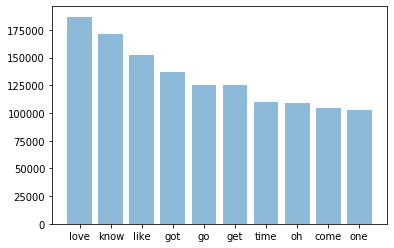

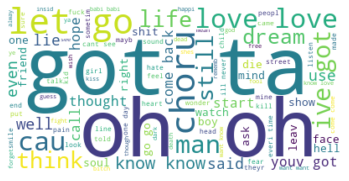

In [137]:
word_dist(processed_text)
wordcloud(processed_text)

Rock

The 10 most common words in the dataset are :
know : 80268
love : 77804
like : 61383
go : 60526
got : 58233
time : 56019
come : 51871
oh : 51757
get : 51606
your : 50548


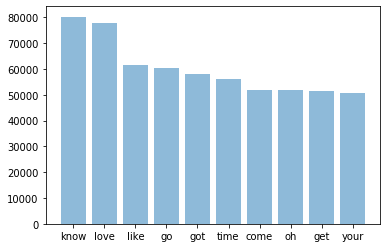

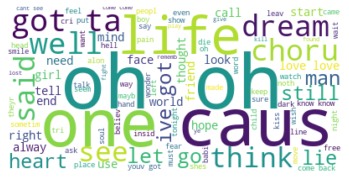

In [138]:
word_dist(rock)
wordcloud(rock)

Pop

The 10 most common words in the dataset are :
love : 53150
know : 35883
oh : 29176
like : 27356
got : 25543
go : 24332
babi : 21657
your : 21582
let : 21121
want : 21010


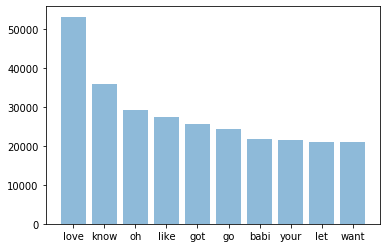

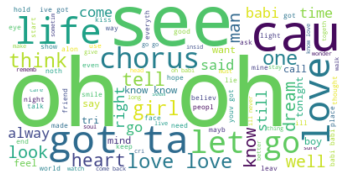

In [139]:
word_dist(pop)
wordcloud(pop)

Metal

The 10 most common words in the dataset are :
life : 9203
one : 8645
time : 8462
never : 7421
see : 7305
know : 6876
like : 6584
come : 6572
take : 5688
go : 5438


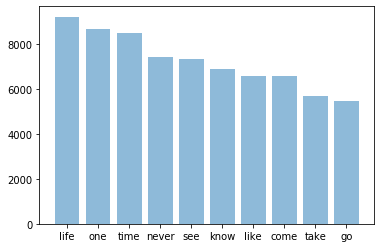

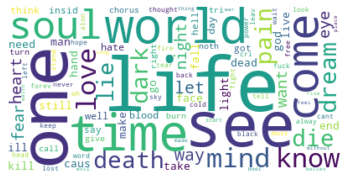

In [140]:
word_dist(metal)
wordcloud(metal)

Hip-Hop

The 10 most common words in the dataset are :
like : 39838
get : 34847
got : 33952
know : 26600
go : 18353
caus : 18062
let : 15882
love : 15234
see : 14737
come : 14453


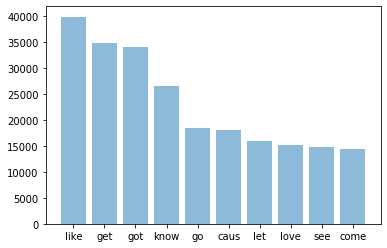

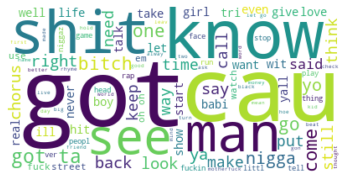

In [141]:
word_dist(hiphop)
wordcloud(hiphop)

Country

The 10 most common words in the dataset are :
love : 13308
know : 8199
like : 7187
go : 6499
got : 6198
time : 6004
one : 5743
oh : 5097
get : 4981
come : 4876


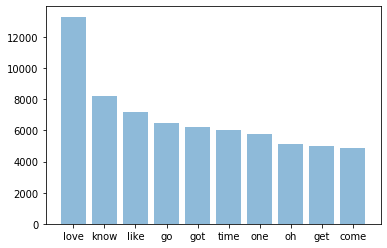

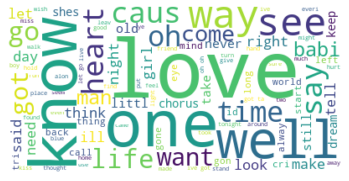

In [142]:
word_dist(country)
wordcloud(country)

Jazz

The 10 most common words in the dataset are :
love : 9409
know : 3991
go : 3152
got : 3126
like : 2933
oh : 2907
come : 2712
your : 2628
babi : 2555
heart : 2489


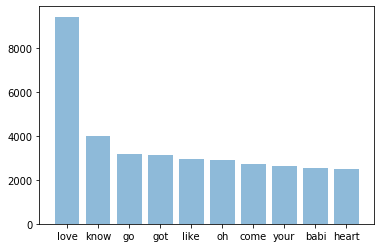

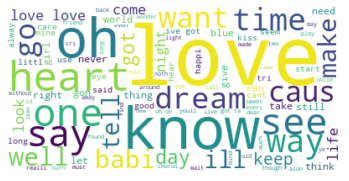

In [143]:
word_dist(jazz)
wordcloud(jazz)

Electronic

The 10 most common words in the dataset are :
love : 4865
know : 3334
oh : 3044
go : 3024
come : 2970
like : 2775
get : 2763
want : 2558
time : 2259
one : 2209


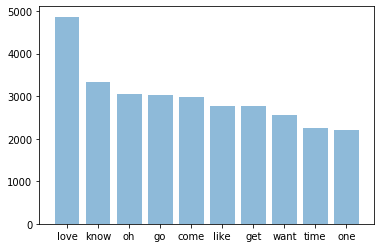

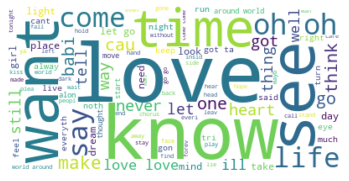

In [144]:
word_dist(electronic)
wordcloud(electronic)

R&B

The 10 most common words in the dataset are :
love : 6055
babi : 4128
know : 4071
oh : 3379
got : 2978
want : 2564
go : 2379
time : 2352
get : 2180
your : 2170


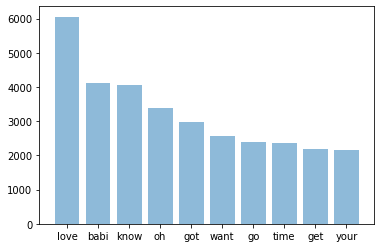

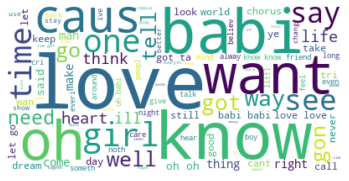

In [145]:
word_dist(rb)
wordcloud(rb)

Indie

The 10 most common words in the dataset are :
know : 1980
love : 1669
go : 1347
like : 1346
oh : 1274
come : 1149
your : 1062
get : 1020
time : 964
ill : 881


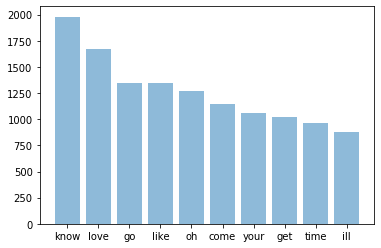

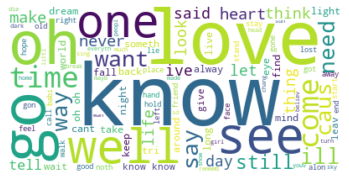

In [146]:
word_dist(indie)
wordcloud(indie)

Folk

The 10 most common words in the dataset are :
love : 578
go : 490
know : 464
oh : 433
like : 411
time : 403
come : 376
see : 359
got : 351
day : 337


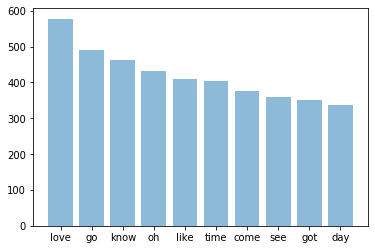

<FreqDist with 6219 samples and 57974 outcomes>


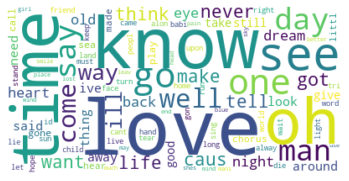

In [150]:
word_dist(folk)
wordcloud(folk)

## Sentiment Analysis

In [280]:
def nltk_sentiment(sentence):
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score

In [283]:
df = pd.DataFrame(columns=('genre', 'pos', 'neu', 'neg'))

Get the percentage of positive, neutal and negative lyrics by genre

In [290]:
def get_percentage(genre):
    
    num_positive = 0
    num_negative = 0
    num_neutral = 0
    
    for lyrics in genre.processed_lyrics:
        comp = nltk_sentiment(lyrics)['compound']
        if comp >= 0.5:
            num_positive += 1
        elif comp > -0.5 and comp < 0.5:
            num_neutral += 1
        else:
            num_negative += 1
            
    num_total = num_negative + num_neutral + num_positive
    percent_negative = (num_negative/float(num_total))*100
    percent_neutral = (num_neutral/float(num_total))*100
    percent_positive = (num_positive/float(num_total))*100
    return [percent_negative, percent_neutral, percent_positive]
    


In [291]:
folk_perc = get_percentage(folk)
indie_perc = get_percentage(indie)
rb_perc = get_percentage(rb)
electronic_perc = get_percentage(electronic)
jazz_perc = get_percentage(jazz)
country_perc = get_percentage(country)
hiphop_perc = get_percentage(hiphop)
metal_perc = get_percentage(metal)
pop_perc = get_percentage(pop)
rock_perc = get_percentage(rock)

In [292]:
perc = [rock_perc, pop_perc, metal_perc, hiphop_perc, country_perc, jazz_perc, electronic_perc, rb_perc, indie_perc, folk_perc]

In [293]:
for i in range(10):
        df.loc[i] = (genre[i], perc[i][0], perc[i][1], perc[i][2])

In [294]:
df

,genre,pos,neu,neg
0,Rock,28.491904,16.399383,55.108712
1,Pop,19.328270,10.936999,69.734731
2,Metal,60.861109,13.632747,25.506144
3,Hip-Hop,45.895564,6.311061,47.793375
4,Country,17.122379,13.339527,69.538094
5,Jazz,12.975988,11.181179,75.842833
6,Electronic,26.074600,18.152753,55.772647
7,R&B,21.011494,10.206897,68.781609
8,Indie,24.658574,16.464340,58.877086
9,Folk,24.708171,12.645914,62.645914


Produce the bar chart of the propotion of positive lyrics by genre

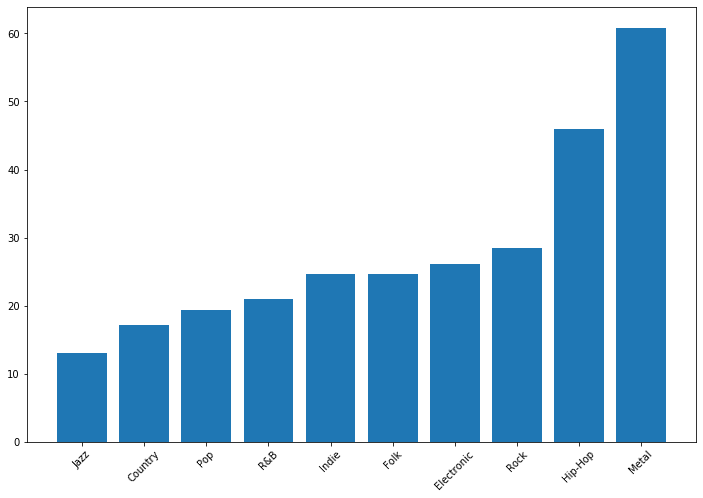

In [298]:
fig, ax = plt.subplots(figsize=(12,8))
df = df.sort_values(by=['pos'])
plt.bar(y_pos, df.pos, align='center')
plt.xticks(y_pos, df.genre)
plt.xticks(rotation = 45)
    
plt.show()

Produce the bar chart of the propotion of neutral lyrics by genre

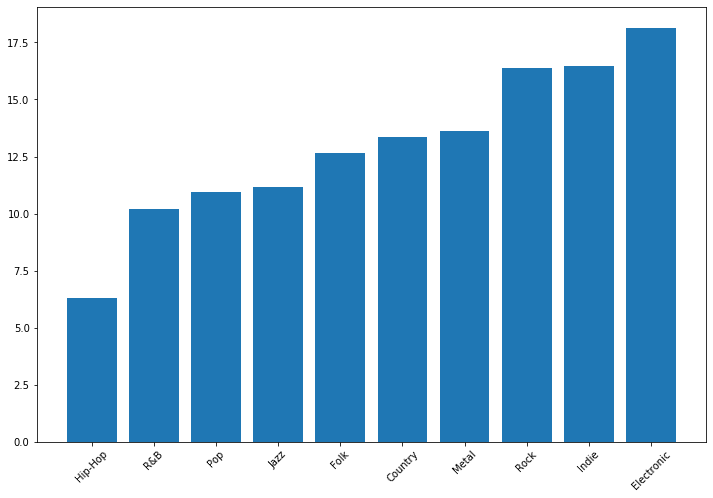

In [299]:
fig, ax = plt.subplots(figsize=(12,8))
df = df.sort_values(by=['neu'])
plt.bar(y_pos, df.neu, align='center')
plt.xticks(y_pos, df.genre)
plt.xticks(rotation = 45)
    
plt.show()

Produce the bar chart of the propotion of negative lyrics by genre

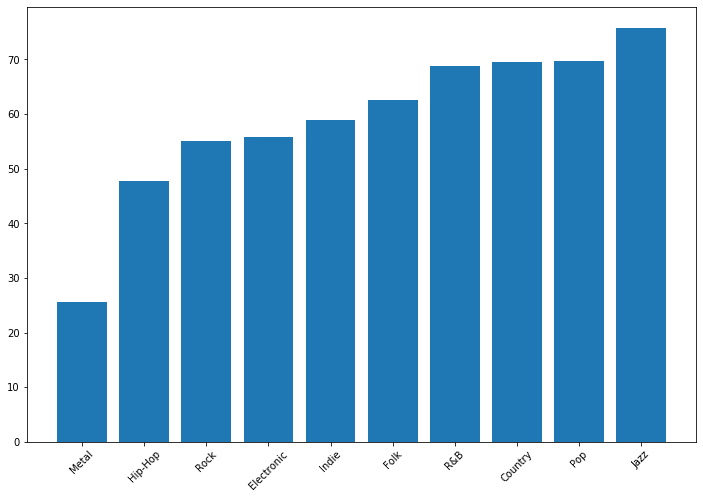

In [300]:
fig, ax = plt.subplots(figsize=(12,8))
df = df.sort_values(by=['neg'])
plt.bar(y_pos, df.neg, align='center')
plt.xticks(y_pos, df.genre)
plt.xticks(rotation = 45)
    
plt.show()